<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2

import ipycytoscape
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import numpy as np
import pandas as pd
import pickle
import os
import re
import itertools as itr
from src.visualize.visualize import plot_correlation_density, plot_vector, plot_lambda_collectivity
from src.enm import Enm
from src.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
os.chdir('../')

In [23]:

with open(f'data/interim/pcc_0909/pcc.pickle','rb') as f:
    e_pcc = pickle.load(f)



In [24]:
pos = e_pcc.graph_gc.nodes('pos')

In [25]:
e_pcc.df['eff_norm'] = e_pcc.df.eff/e_pcc.df.shape[0]
e_pcc.df['sens_norm'] = e_pcc.df.sens/e_pcc.df.shape[0]

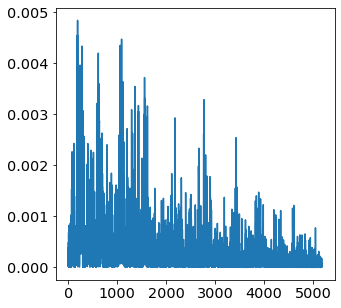

In [26]:
plt.plot(e_pcc.df.eff_norm)

In [27]:
e_pcc.e_list

In [28]:
for i in range(10):
    print(i)
    e_pcc.e_list[i].df['eff_norm']=e_pcc.e_list[i].df['eff']/e_pcc.e_list[i].df.shape[0]
    e_pcc.e_list[i].df['sens_norm']=e_pcc.e_list[i].df['sens']/e_pcc.e_list[i].df.shape[0]

0
1
2
3
4
5
6
7
8
9


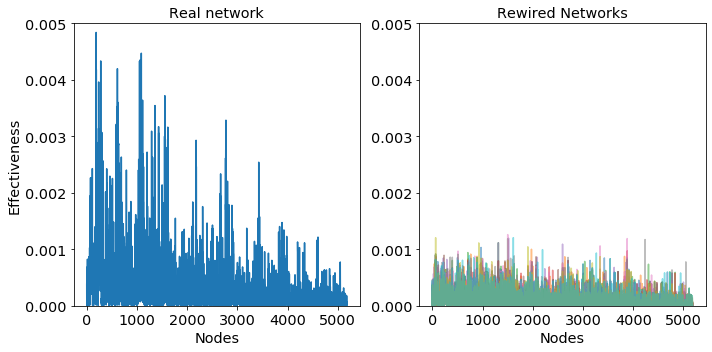

In [82]:
fig,ax = plt.subplots(1,2,figsize=(10,5),facecolor="w")
ax[0].plot(e_pcc.df.eff_norm)

for i in range(10):
    ax[1].plot(e_pcc.e_list[i].df.eff_norm,alpha=0.5)
ax[1].set_ylim(0,0.005)
ax[0].set_ylim(0,0.005)

ax[0].set_title('Real network')
ax[1].set_title('Rewired Networks')
ax[0].set_ylabel('Effectiveness')
ax[0].set_xlabel('Nodes')
ax[1].set_xlabel('Nodes')
plt.tight_layout()
ax[0].set_facecolor('white')
ax[1].set_facecolor('white')
plt.show()

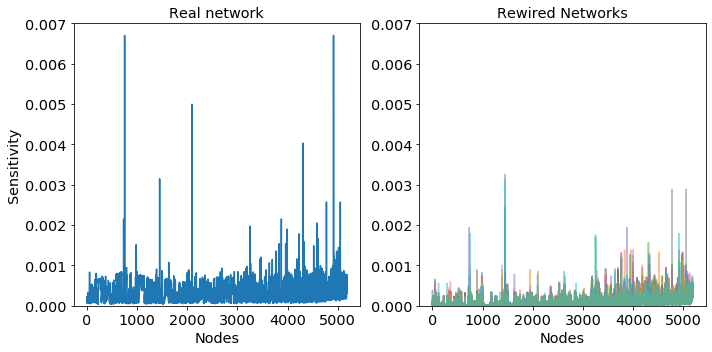

In [81]:
fig,ax = plt.subplots(1,2,figsize=(10,5),facecolor="w")
ax[0].plot(e_pcc.df.sens_norm)

for i in range(10):
    ax[1].plot(e_pcc.e_list[i].df.sens_norm,alpha=0.5)
ax[1].set_ylim(0,0.007)
ax[0].set_ylim(0,0.007)

ax[0].set_title('Real network')
ax[1].set_title('Rewired Networks')
ax[0].set_ylabel('Sensitivity')
ax[0].set_xlabel('Nodes')
ax[1].set_xlabel('Nodes')
plt.tight_layout()
plt.show()

In [65]:
from scipy.stats import pearsonr
pearsonr(e_pcc.df.sens_norm, e_pcc.e_list[9].df.sens_norm)

(0.48480916187973966, 8.415935848187945e-304)

In [6]:
ba = Enm('ba')
g = nx.barabasi_albert_graph(10,2)
ba.G = g
ba.giant_component()

In [9]:
ba.laplacian_matrix()
ba.gnm_analysis(normalized=False)

@> 9 modes were calculated in 0.00s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 0.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.0s.
@> Perturbation response scanning completed in 0.0s.


In [10]:
ba.gnm.getCovariance()

array([[ 0.29778761, -0.1300885 , -0.01238938,  0.11371681,  0.0340708 ,
        -0.08318584, -0.15663717, -0.12123894, -0.09778761,  0.15575221],
       [-0.1300885 ,  0.38746313, -0.00516224, -0.14011799, -0.0899705 ,
        -0.03466077,  0.12640118,  0.14115044, -0.0699115 , -0.18510324],
       [-0.01238938, -0.00516224,  0.12728614, -0.01651917,  0.00412979,
        -0.00250737, -0.05383481,  0.01106195,  0.01238938, -0.06445428],
       [ 0.11371681, -0.14011799, -0.01651917,  0.40162242, -0.0379056 ,
        -0.11091445, -0.17551622, -0.12831858, -0.11371681,  0.20766962],
       [ 0.0340708 , -0.0899705 ,  0.00412979, -0.0379056 ,  0.3219764 ,
         0.02772861, -0.08112094, -0.09292035, -0.0340708 , -0.0519174 ],
       [-0.08318584, -0.03466077, -0.00250737, -0.11091445,  0.02772861,
         0.26887906,  0.06710914, -0.06858407,  0.08318584, -0.14705015],
       [-0.15663717,  0.12640118, -0.05383481, -0.17551622, -0.08112094,
         0.06710914,  0.54675516, -0.01371681

In [43]:
ba.simulate_rewire(save=False,normalized=False, sim_num=2)


@> 9 modes were calculated in 0.00s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 0.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.0s.
@> Perturbation response scanning completed in 0.0s.
@> 9 modes were calculated in 0.00s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 0.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.0s.
@> Perturbation response scanning completed in 0.0s.


0
1


In [44]:
ba.spring_pos()
pos = ba.graph_gc.nodes('pos')

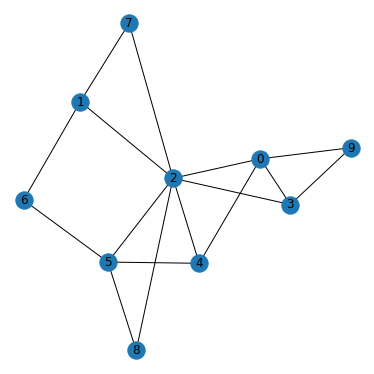

In [45]:
nx.draw(g, pos=pos,with_labels=True)

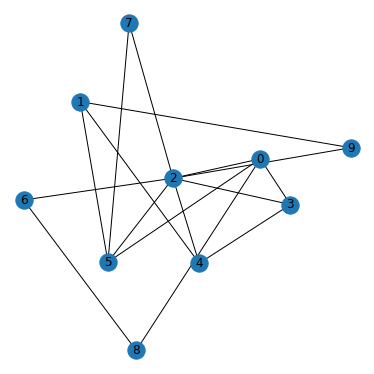

In [46]:
nx.draw(ba.e_list[0].graph_gc, pos=pos,with_labels=True)

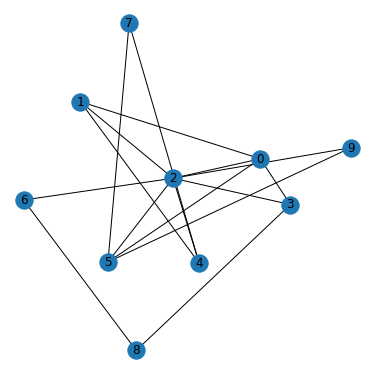

In [47]:
nx.draw(ba.e_list[1].graph_gc, pos=pos,with_labels=True)

In [48]:
rnd = ba.e_list[0]
rnd2 = ba.e_list[1]

In [49]:
rnd.L


matrix([[ 4,  0, -1, -1,  0, -1,  0,  0, -1,  0],
        [ 0,  3,  0,  0, -1, -1,  0,  0,  0, -1],
        [-1,  0,  7, -1, -1, -1, -1, -1,  0, -1],
        [-1,  0, -1,  3, -1,  0,  0,  0,  0,  0],
        [ 0, -1, -1, -1,  3,  0,  0,  0,  0,  0],
        [-1, -1, -1,  0,  0,  4,  0, -1,  0,  0],
        [ 0,  0, -1,  0,  0,  0,  2,  0, -1,  0],
        [ 0,  0, -1,  0,  0, -1,  0,  2,  0,  0],
        [-1,  0,  0,  0,  0,  0, -1,  0,  2,  0],
        [ 0, -1, -1,  0,  0,  0,  0,  0,  0,  2]])

In [50]:
rnd2.L

matrix([[ 4, -1, -1, -1,  0, -1,  0,  0,  0,  0],
        [-1,  3, -1,  0, -1,  0,  0,  0,  0,  0],
        [-1, -1,  7, -1, -1, -1, -1,  0,  0, -1],
        [-1,  0, -1,  3,  0,  0,  0,  0, -1,  0],
        [ 0, -1, -1,  0,  3,  0,  0, -1,  0,  0],
        [-1,  0, -1,  0,  0,  4,  0, -1,  0, -1],
        [ 0,  0, -1,  0,  0,  0,  2,  0, -1,  0],
        [ 0,  0,  0,  0, -1, -1,  0,  2,  0,  0],
        [ 0,  0,  0, -1,  0,  0, -1,  0,  2,  0],
        [ 0,  0, -1,  0,  0, -1,  0,  0,  0,  2]])

In [23]:

ba.L

matrix([[ 4,  0, -1, -1, -1,  0,  0,  0,  0, -1],
        [ 0,  3, -1,  0,  0,  0, -1, -1,  0,  0],
        [-1, -1,  7, -1, -1, -1,  0, -1, -1,  0],
        [-1,  0, -1,  3,  0,  0,  0,  0,  0, -1],
        [-1,  0, -1,  0,  3, -1,  0,  0,  0,  0],
        [ 0,  0, -1,  0, -1,  4, -1,  0, -1,  0],
        [ 0, -1,  0,  0,  0, -1,  2,  0,  0,  0],
        [ 0, -1, -1,  0,  0,  0,  0,  2,  0,  0],
        [ 0,  0, -1,  0,  0, -1,  0,  0,  2,  0],
        [-1,  0,  0, -1,  0,  0,  0,  0,  0,  2]])

In [51]:
rnd.gnm.getEigvals()

array([0.92660906, 1.57700873, 1.83683056, 2.60185738, 2.94275595,
       3.53061854, 4.74379641, 5.67484953, 8.16567385])

In [52]:
rnd2.gnm.getEigvals()

array([0.80493204, 1.62191189, 1.89134194, 2.34331258, 3.09774639,
       3.84248385, 4.62132398, 5.6568672 , 8.12008014])

In [32]:
(ba.gnm.getEigvals())

array([0.78699959, 1.42236445, 1.81715694, 2.40290491, 3.45860853,
       3.87790165, 4.74091501, 5.37314871, 8.1200002 ])

In [54]:
np.around(rnd.prs_mat,3)[2,:]

array([0.006, 0.087, 0.   , 0.001, 0.   , 0.   , 0.025, 0.008, 0.265,
       0.002])

In [55]:
np.around(rnd2.prs_mat,3)[2,:]

array([0.002, 0.005, 0.   , 0.007, 0.002, 0.   , 0.021, 0.179, 0.257,
       0.01 ])

In [56]:
np.around(ba.prs_mat,3)[2,:]

array([0.009, 0.002, 0.   , 0.017, 0.001, 0.   , 0.179, 0.008, 0.009,
       0.256])

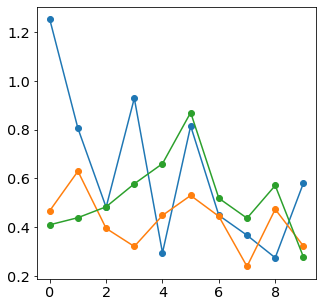

In [72]:
i =3 
plt.plot(np.around(ba.df.eff,6),'-o')
plt.plot(np.around(rnd.df.eff,6),'-o')
plt.plot(np.around(rnd2.df.eff,6),'-o')


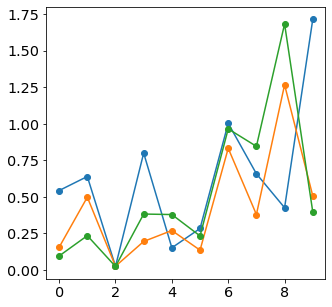

In [73]:
i =3 
plt.plot(np.around(ba.df.sens,6),'-o')
plt.plot(np.around(rnd.df.sens,6),'-o')
plt.plot(np.around(rnd2.df.sens,6),'-o')


In [71]:
rnd2.df.eff

0    0.409674
1    0.438890
2    0.483559
3    0.578026
4    0.660777
5    0.870576
6    0.518681
7    0.436765
8    0.571069
9    0.278017
Name: eff, dtype: float64